# This notebook shows an example of a compressed Zarr file without Zarr file extension

This notebook shows an example how to preload a Zarr file, which is published in compressed zip format on the [https://zenodo.org](https://zenodo.org) webpage, where the zarr extension is missing. The compressed file will be downloaded, unpacked and the the Zarr files will be made available, which can be subsequently used by the data store as usual. 

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [4]:
%%time
from xcube.core.store import new_data_store
from xcube.core.store import get_data_store_params_schema

CPU times: user 6 μs, sys: 1e+03 ns, total: 7 μs
Wall time: 8.58 μs


First, we get the store parameters needed to initialize a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [5]:
%%time
store_params = get_data_store_params_schema("zenodo")
store_params

CPU times: user 46 μs, sys: 5 μs, total: 51 μs
Wall time: 53.6 μs


We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) for the record https://zenodo.org/records/7108392 with the record ID `root="7108392"`. Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function. We can optionally specify the cache data store's ID and parameters using the `cache_store_id` and `cache_store_params` keyword arguments. By default, `cache_store_id` is set to `file`, and `cache_store_params` defaults to `dict(root="zenodo_cache/7108392", max_depth=10)`.

In [6]:
%%time
store = new_data_store("zenodo", root="7108392")

CPU times: user 4.71 ms, sys: 84 μs, total: 4.79 ms
Wall time: 4.76 ms


Compressed files can be preloaded using the `preload_data` method. This approach enables the downloading of compressed files that cannot be lazily loaded, allowing them to be stored and readily available for the duration of the project. Also this method uses `preload_params`, which can be viewed in the next cell.

In [7]:
%%time
preload_params = store.get_preload_data_params()
preload_params

CPU times: user 43 μs, sys: 6 μs, total: 49 μs
Wall time: 51.5 μs


The `preload_data` method returns a store which may be used subsequently to access the preloaded data, as shown in the subsequent cells. If no data IDs are given, all available data in compressed format will be preloaded. Note that the `preload_method` is new and highly experimental. 

In [8]:
cache_store = store.preload_data("seasfire.zip")

The data IDs of preloaded datasets can be viewed using the following line. The new data ID is identical to the original, except that the `.zip` extension indicating a compressed format has been removed and a `.zarr` extension has been added.

In [9]:
cache_store.list_data_ids()

['seasfire.zarr']

Next we want to open one of the datasets. We first view the availbale parameters to open the data. 

In [10]:
%%time
open_params = cache_store.get_open_data_params_schema(data_id="seasfire.zarr")
open_params

CPU times: user 225 μs, sys: 387 μs, total: 612 μs
Wall time: 615 μs


In [11]:
%%time
ds = cache_store.open_data("seasfire.zarr")
ds

CPU times: user 23.9 ms, sys: 192 μs, total: 24.1 ms
Wall time: 36.8 ms


<xarray.Dataset> Size: 152GB
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 6kB 89.88 ... -89.88
  * longitude                       (longitude) float64 12kB -179.9 ... 179.9
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/54)
    area                            (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    fcci_ba                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

We plot the opened data at the last time step as an example below.

CPU times: user 9.07 s, sys: 10.6 s, total: 19.7 s
Wall time: 2.27 s


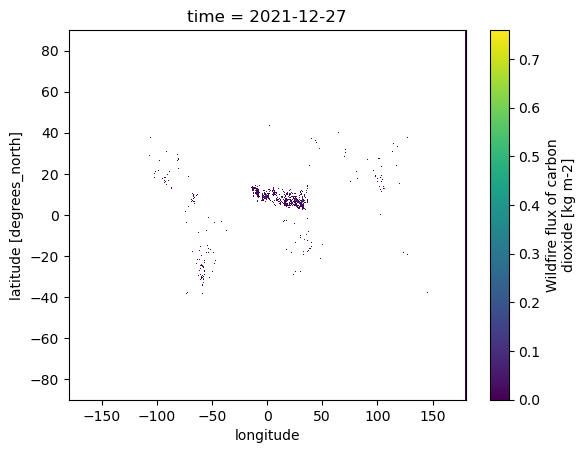

In [12]:
%%time
ds.cams_co2fire.isel(time=-1).plot()